<a href="https://colab.research.google.com/github/atstuyuki/ScikitLearn/blob/main/ARCR_retear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ライブラリのインポート

# data analysis and wranglinimport seaborn as sns

import math
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler #正規化（最小0,最大1となるように変換）
from sklearn.preprocessing import StandardScaler #標準化（平均0,分散1となるように変換）
from sklearn.preprocessing import RobustScaler #中央値0,四分位範囲1となるように変換(外れ値の影響を抑える)
from sklearn.preprocessing import LabelEncoder #カテゴリ変数の置換
from sklearn.pipeline import Pipeline #パイプライン（変換器と推定器を結合）
from sklearn.model_selection import train_test_split
#splitting data : train_data 80%,test_data 20%
#X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.20, random_state=1)

# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression #線形回帰
from sklearn.linear_model import Lasso, LassoCV #Lasso ,LassoCV(内部チューニング)
from sklearn.linear_model import Ridge, RidgeCV #Ridge ,RidgeCV(内部チューニング) 
from sklearn.linear_model import ElasticNet ,ElasticNetCV #RElasticNet , ElasticNetCV(内部チューニング) 
from sklearn.linear_model import LogisticRegression #ロジスティック回帰
from sklearn.kernel_ridge import KernelRidge #カーネルリッジ回帰
from sklearn.svm import SVC, LinearSVC #SVM
from sklearn.decomposition import PCA #PCA(主成分分析）
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #LDA(線形判別分析)
from sklearn.ensemble import RandomForestClassifier #ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor #ランダムフォレスト回帰
from sklearn.ensemble import GradientBoostingRegressor #勾配ブースティング回帰
from sklearn.neighbors import KNeighborsClassifier #k近傍法
from sklearn.cluster import KMeans #k-means法 (非階層的クラスタリング(クラスター分析))
from sklearn.cluster import AgglomerativeClustering #階層的クラスタリング(クラスター分析)
from sklearn.cluster import DBSCAN #DBSCAN(クラスター分析)
from sklearn.naive_bayes import GaussianNB #ナイーブベイズ（正規分布ver)
from sklearn.linear_model import Perceptron #パーセプトロン
from sklearn.linear_model import SGDClassifier #確率的勾配降下
from sklearn.tree import DecisionTreeClassifier #決定木
from sklearn.tree import DecisionTreeRegressor #決定木回帰
import xgboost as xgb #XGBoost
import lightgbm as lgb #LightGBM


#model_evaluation & tuning
from sklearn.metrics import r2_score #決定係数R^2
from sklearn.metrics import mean_squared_error #平均二乗誤差MSE 
from sklearn.metrics import confusion_matrix #混同行列
from sklearn.metrics import accuracy_score #正解率
from sklearn.model_selection import KFold #k分割交差検証
from sklearn.model_selection import StratifiedKFold #層化k分割交差検証
from sklearn.model_selection import cross_val_score #交差検証のスコア
from sklearn.model_selection import learning_curve #学習曲線
from sklearn.model_selection import validation_curve #検証曲線
from sklearn.model_selection import GridSearchCV #グリッドサーチ

#ignore warnings which are not unrelated to work
#実行に影響がない警告の非表示
import warnings
warnings.filterwarnings('ignore')

In [2]:
#手元の画像をgoogle colabにupload

from google.colab import files
import os
uploaded = files.upload()
#uploadedは辞書型なのでファイル名を取り出し、絶対パスを取得してfullpathという変数を当てる
for k in uploaded.keys():
  print('file name:',k)
fullpath=os.path.abspath(k)
print('fullpath:',fullpath)

Saving 20220209ARCR.csv to 20220209ARCR.csv
file name: 20220209ARCR.csv
fullpath: /content/20220209ARCR.csv


In [3]:
#dataのインポート  \を　/に置き換えfullpathを代入　csvを’,'で区切る 
#文字認識異常が出た時は　encoding='UTF-8'や’shift_jis'にする　もともとのCSVファイルの文字形式を確認する
#もともとのCSVで数値がintやfloatではなくstring等の事があるので、良くチェックしておく
#https://insilico-notebook.com/python-unicodedecodeerror/
df=pd.read_csv("./20220209ARCR.csv",sep=',',encoding='UTF-8')

In [26]:
df.head()#データの最初の5行の表示

,Stump_type,Gender,Age,DM,HL,TearSize,Goutallier,Retear,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,3,M,59,0,0,3,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,F,68,0,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,F,71,0,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,F,59,0,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,3,M,57,0,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#dfの型の確認　object型等は変更する必要がある
df.dtypes

Stump_type     int64
Gender        object
Age            int64
DM             int64
HL             int64
TearSize       int64
Goutallier     int64
Retear         int64
dtype: object

In [28]:
#今回の解析に不要な列をdrop
#df=df.drop(['Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis='columns') 

In [5]:
#カテゴリ変数をone hot enchoding (drop_first=Trueならダミーエンコーディングなので1次元削減)
#今回はSEX_Mがone hot enchodingされる
df= pd.get_dummies(df,drop_first=True) 
df.dtypes

Stump_type    int64
Age           int64
DM            int64
HL            int64
TearSize      int64
Goutallier    int64
Retear        int64
Gender_M      uint8
dtype: object

In [6]:
#dfの欠損値の確認
df.isnull().sum()

Stump_type    0
Age           0
DM            0
HL            0
TearSize      0
Goutallier    0
Retear        0
Gender_M      0
dtype: int64

In [7]:
# データフレームの統計量記述
df.describe()

,Stump_type,Age,DM,HL,TearSize,Goutallier,Retear,Gender_M
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,1.807692,64.800000,0.253846,0.315385,1.938462,1.838462,0.130769,0.546154
std,0.817409,8.598179,0.436894,0.466466,0.929732,0.833447,0.338452,0.499791
min,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,59.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,65.500000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000
75%,2.750000,71.000000,0.750000,1.000000,3.000000,2.000000,0.000000,1.000000
max,3.000000,83.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000


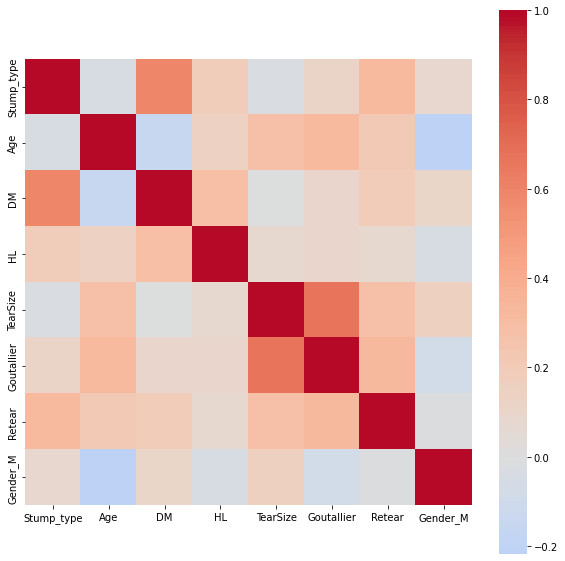

In [8]:
#dfでの相関係数のheatmap 白黒表示であればcmap='binary'とする
plt.figure(figsize=(10,10))
cmap=sns.color_palette('coolwarm',200)
sns.heatmap(df.corr(),square=True,annot=False,cmap=cmap,center=0)

In [9]:
#Pandasで目的変数別に色分けしたヒストグラムを作成する
#関数の指定
#http://own-search-and-study.xyz/2018/02/27/pandas%e3%81%a7%e7%9b%ae%e7%9a%84%e5%a4%89%e6%95%b0%e5%88%a5%e3%81%ab%e8%89%b2%e5%88%86%e3%81%91%e3%81%97%e3%81%9f%e3%83%92%e3%82%b9%e3%83%88%e3%82%b0%e3%83%a9%e3%83%a0%e3%82%92%e4%bd%9c%e6%88%90/
import pandas as pd
 
def targethist(df, target, save=False, kind='hist', **kwards):
     
    columns = df.columns[df.columns != target]
    pdf = df.pivot_table(index=df.index, columns=target)
     
    for column in columns:
         
        ax = pdf.loc[:, column].plot(kind=kind, title=column, **kwards)
         
        if save==True:
            ax.get_figure().savefig(column+".png") 

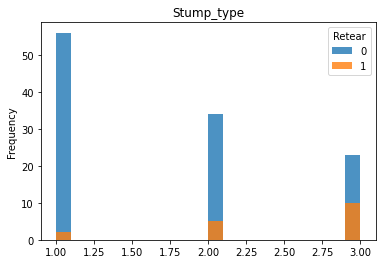

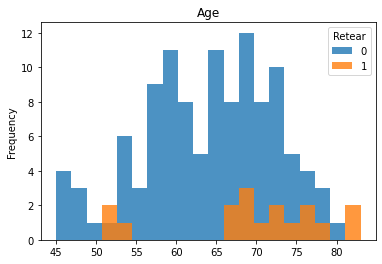

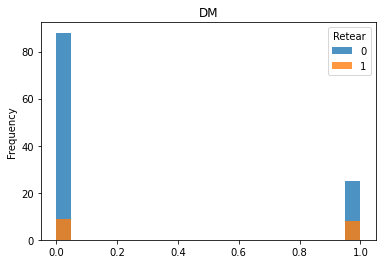

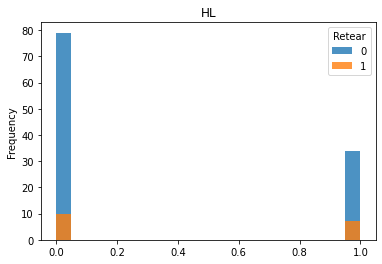

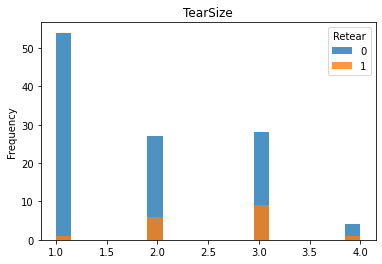

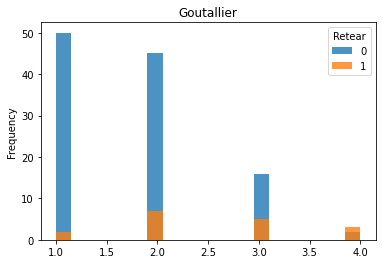

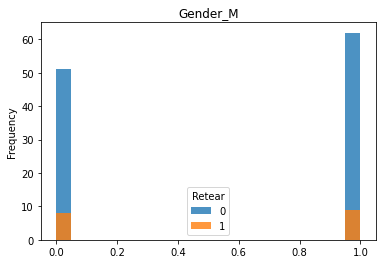

In [10]:
#関数targethistに引数を渡す　
#pandasのplotをラップしている点を活用してパラメータを指定します。
targethist(df,target='Retear', bins=20, alpha=0.8)

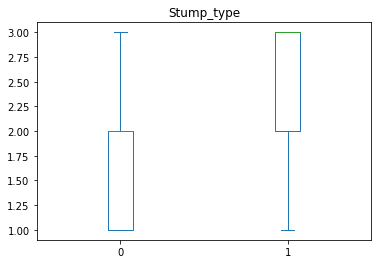

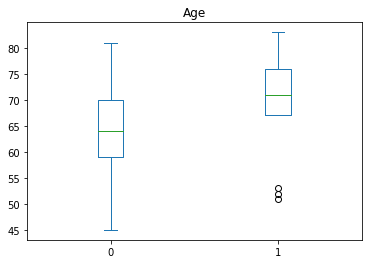

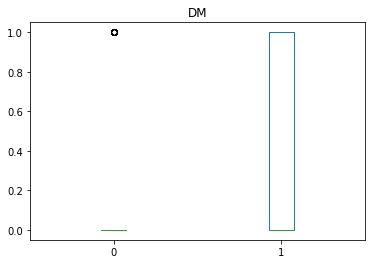

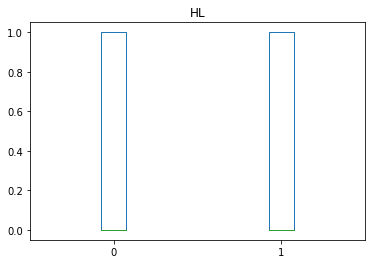

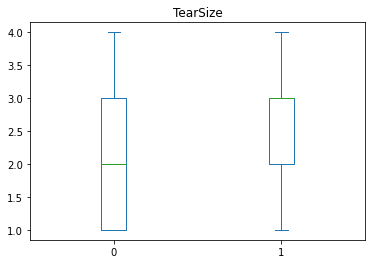

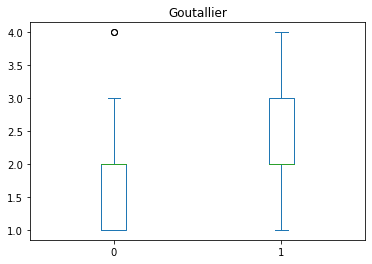

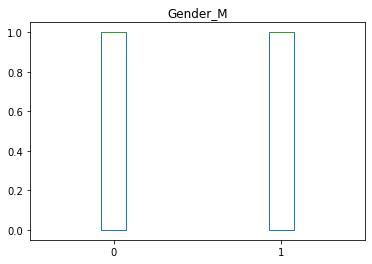

In [11]:
#Retearの有無でのBoxplot
targethist(df, target="Retear", kind='box')

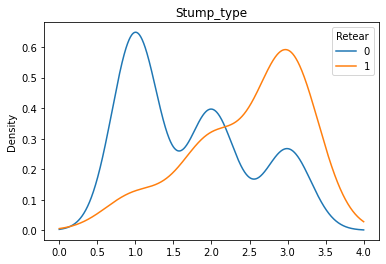

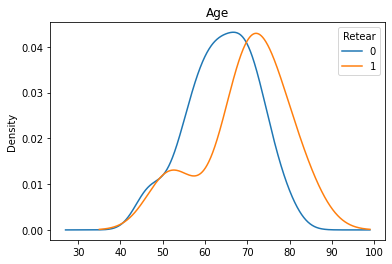

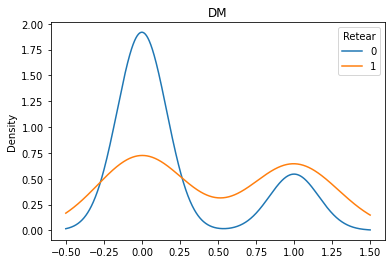

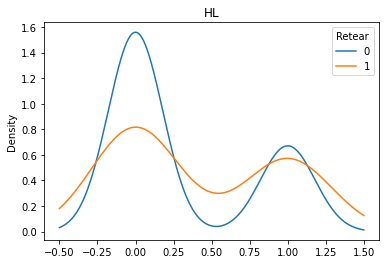

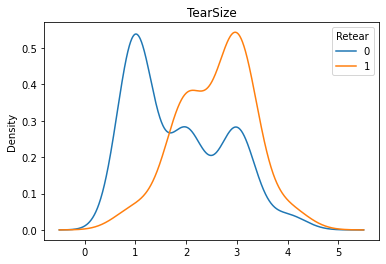

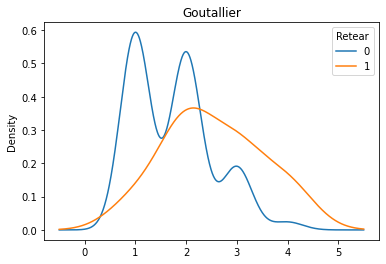

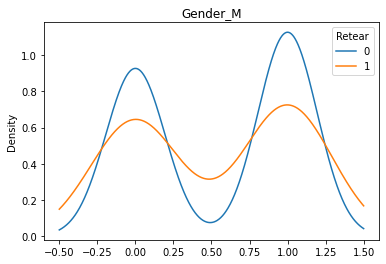

In [12]:
#カーネル密度推定
targethist(df, target="Retear", kind='kde')

In [15]:
#DAS<2.3(0=No　１＝YES)の有無でグループ分け
grouped=df.groupby('Retear')
#各グループの平均値を表示 省略されないように5データフレームの50列まで表示するように設定
pd.set_option('display.max_columns', 50)
print(grouped.mean())

        Stump_type        Age        DM        HL  TearSize  Goutallier  \
Retear                                                                    
0         1.707965  64.079646  0.221239  0.300885  1.840708    1.734513   
1         2.470588  69.588235  0.470588  0.411765  2.588235    2.529412   

        Gender_M  
Retear            
0       0.548673  
1       0.529412  


In [16]:
#各グル―プの標準偏差を表示
print(grouped.std())

        Stump_type       Age        DM        HL  TearSize  Goutallier  \
Retear                                                                   
0         0.786963  8.229023  0.416930  0.460686  0.921629    0.767855   
1         0.717430  9.695739  0.514496  0.507300  0.712287    0.943242   

        Gender_M  
Retear            
0       0.499842  
1       0.514496  


In [20]:
#statsmodelsによる重回帰分析 結果の解釈は　https://tanuhack.com/statsmodels-multiple-lra/#StatsModels
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# get_dummies()カテゴリ変数をone-hot-enchodingで質的データも対応可能
x = pd.get_dummies(df.drop(['Retear',],axis='columns') ) # ←もちろん増減可能 今回は目的変数以外すべて採用
y = df['Retear']#目的変数の列

# 定数項(y切片)を必要とする線形回帰のモデル式ならば必須
X = sm.add_constant(x)

# 最小二乗法によるモデリング
model = sm.OLS(y,X)
result = model.fit()

# 重回帰分析の結果を表示 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Retear   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     4.843
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           7.65e-05
Time:                        02:26:05   Log-Likelihood:                -27.183
No. Observations:                 130   AIC:                             70.37
Df Residuals:                     122   BIC:                             93.31
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6781      0.231     -2.939      0.004      -1.135      -0.221
Stump_type     0.1222      0.042      2.926      0.004       0.040       0.205
Age            0.0060      0.004      1.684      0.095      -0.001       0.013
DM             0.0313      0.081      0.385      0.701      -0.130       0.192
HL            -0.0246      0.062     -0.395      0.693      -0.148       0.099
TearSize       0.0555      0.042      1.319      0.190      -0.028       0.139
Goutallier     0.0561      0.047      1.202      0.232      -0.036       0.148
Gender_M      -0.0163      0.059     -0.276      0.783      -0.134       0.101
==============================================================================
Omnibus:                       42.325   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.303
Skew:                           1.565   Prob(JB):                     1.99e-16
Kurtosis:                       4.883   Cond. No.                         562.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#分類するクラスを確認  'Retear'=0が再断裂なし　１が再断裂あり
df['Retear'].value_counts()

0    113
1     17
Name: Retear, dtype: int64

In [22]:
target='Retear'

In [26]:
#データセットの分割　正解クラス　説明変数の指定
#訓練データの不要な列を df.drop([],axis='columns')で指定
#テストデータ数が少ないのでtestデータを30%に指定
train_x=df.drop([target],axis='columns') 
train_y=df[target]
(train_x,test_x,train_y,test_y)=train_test_split(train_x,train_y,test_size=0.3,random_state=0)

まずは不均等データのままでランダムフォレスト/ロジスティック回帰で分析してみる

In [27]:
#データセットの形確認
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(91, 7)
(39, 7)
(91,)
(39,)


In [28]:
# 訓練データ中のRetear=1のサンプル数をカウント(train_yの'1'の数値の合計)
#テストデータ中もカウント
positive_count_train =train_y.sum()
positive_count_test=test_y.sum()
print('positive target numbers in train: {}'.format(positive_count_train))
print('positive target numbers in test:{}'.format(positive_count_test))

positive target numbers in train: 12
positive target numbers in test:5


In [29]:
#評価用関数のインポートおよび定義
from sklearn.metrics import recall_score#recall score用の関数インポート
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [30]:
#感度　特異度の関数定義

#感度
def sensitivity1(test_y, pred_y):
    cm = confusion_matrix(test_y,pred_y, labels=[1, 0])
    return cm[0, 0]/ (cm[0,0]+cm[0,1])

#特異度
def specificity1(test_y, pred_y):
    cm = confusion_matrix(test_y, pred_y, labels=[1, 0])
    return cm[1, 1]/ (cm[1,0]+cm[1,1])

ランダムフォレストモデル＋gridSearchによる予測モデル構築

In [31]:
#ランダムフォレストモデルの構築
gridsearch = {'n_estimators': [100,200,300,400],#決定木の数を辞書で渡す
             'max_depth': [4,5,6]}#決定木の数を辞書で渡す
score='balanced_accuracy'#モデルの評価関数を指定
                 #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                 #　今回は検診で偽陰性をへらしたいのでpercisionを使用
model_rf=GridSearchCV(RandomForestClassifier(),#分類器の指定
                 gridsearch,#グリッドサーチで定義した辞書を渡す
                 cv=5,              #交差検定の回数指定
                 n_jobs= -1, #-1に設定するとコア数で並列実行
                 scoring=score,#モデルの評価関数の指定 今回は異常検知なのでrecall使用
                 verbose=True) #verbose=Trueで実行状況の表示
model_rf.fit(train_x,train_y)#学習の実行 fit関数
pred_y=model_rf.predict(test_x)#予測値の算出
train_accuracy=model_rf.score(train_x,train_y)#学習データでの精度の算出
print('Train Accuracy:{}'.format(train_accuracy))
test_accuracy=accuracy_score(test_y,pred_y)#テストデータでの精度の算出
print('Test Accuracy:{}'.format(test_accuracy))
recall=recall_score(test_y,pred_y)
print('Recall:{}'.format(recall))
precision=precision_score(test_y,pred_y)
print('Precision:{}'.format(precision))
f_measure=f1_score(test_y,pred_y)
print('F-measure:{}'.format(f_measure))
sensitivity=sensitivity1(test_y,pred_y)
print('Sensitivity:{}'.format(sensitivity))
specificity=specificity1(test_y,pred_y)
print('Specificity:{}'.format(specificity))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train Accuracy:0.9166666666666667
Test Accuracy:0.8717948717948718
Recall:0.0
Precision:0.0
F-measure:0.0
Sensitivity:0.0
Specificity:1.0


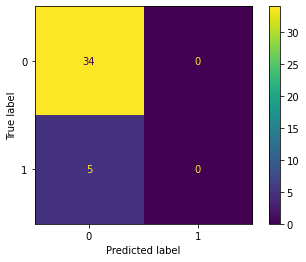

In [32]:
#plot_confusion_matrixのデフォルト設定でもプロットしてみる
#confusion_matrix関数と渡す引数がちがうことに注意
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(model_rf,test_x,test_y)

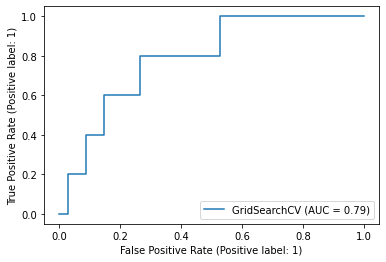

In [33]:
#plot_roc_curve関数によるROC曲線のプロット　引数は　モデル、test_x, test_y
from sklearn import metrics
rf_disp=metrics.plot_roc_curve(model_rf,test_x,test_y)  # treeのROC曲線
plt.show(rf_disp)  

ロジスティック回帰モデルによる予測モデル構築

In [34]:
#ロジスティック回帰による分類
from sklearn.model_selection import cross_val_predict #交差検証
model_LR=LogisticRegression(solver='liblinear')#ハイパーパラメーターをかっこ内に記述
pred_y=cross_val_predict(model_LR,test_x,test_y,cv=5) #cross validation の分割数を指定
model_LR.fit(train_x,train_y)

acc=accuracy_score(test_y,pred_y)
recall=recall_score(test_y,pred_y)
precision=precision_score(test_y,pred_y)

print('Accuracy:',acc)
print('Recall:',recall)
print('Precision:',precision)
conf_matrix=confusion_matrix(test_y,pred_y)
tn_LR,fp_LR,fn_LR,tp_LR=conf_matrix.ravel()
print('tn_LR,fp_LR,fn_LR,tp_LR=',tn_LR,fp_LR,fn_LR,tp_LR)
f_measure=f1_score(test_y,pred_y)
print('F-measure:{}'.format(f_measure))
sensitivity=sensitivity1(test_y,pred_y)
print('Sensitivity:{}'.format(sensitivity))
specificity=specificity1(test_y,pred_y)
print('Specificity:{}'.format(specificity))

Accuracy: 0.8974358974358975
Recall: 0.2
Precision: 1.0
tn_LR,fp_LR,fn_LR,tp_LR= 34 0 4 1
F-measure:0.33333333333333337
Sensitivity:0.2
Specificity:1.0


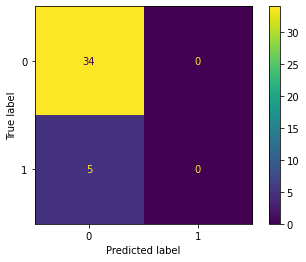

In [35]:
#plot_confusion_matrixのデフォルト設定でプロット
#confusion_matrix関数と渡す引数がちがうことに注意
plot_confusion_matrix(model_LR,test_x,test_y)

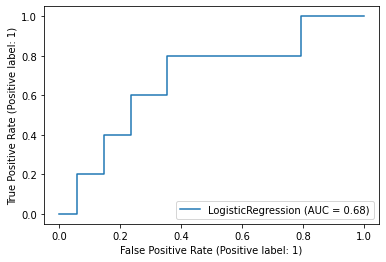

In [36]:
#plot_roc_curve関数によるROC曲線のプロット　引数は　モデル、test_x, test_y
LR_disp=metrics.plot_roc_curve(model_LR,test_x,test_y)  # treeのROC曲線
ax = plt.gca()
plt.show()  

oversamplingを行ってデータの不均衡をなくす　ランダムフォレスト/ロジスティック回帰で分析してみる

In [37]:
#imbalanced-learnでデータの不均衡に対応
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.8.1


 公式ドキュメントでは先にtrain_test_splitしており、testデータではSMOTEしていない kaggleのこの記事参照　 https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets 
 testデータにはoversamplingしたデータは使わない　leakが生じるため
ほかに色々試しているkaggleのnotebook https://www.kaggle.com/andreanuzzo/balance-the-imbalanced-rf-and-xgboost-with-smote

In [39]:
#train_test_splitしてからSMOTEする
train_x=df.drop([target],axis='columns') 
train_y=df[target]
#続いてtain_test_splitで訓練データ　テストデータを再定義 テストデータ多めにしておく>>今回は不均衡あまりないので0.3で
(train_x,test_x,train_y,test_y)=train_test_split(train_x,train_y,test_size=0.3,random_state=0)
#データセットの形確認
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(91, 7)
(39, 7)
(91,)
(39,)


In [40]:
#テストデータの’１’の数のカウント
positive_count_test =test_y.sum()
print('positive count test: {}'.format(positive_count_test))

positive count test: 5


In [43]:
#訓練データのみに対してSMOTEによる水増し
smote = SMOTE(random_state=42)
x_SMOTE, y_SMOTE = smote.fit_resample(train_x,train_y)
print('positive count before oversampling(SMOTE)',train_y.sum())
print('positive count after oversampling(SMOTE)',y_SMOTE.sum())

positive count before oversampling(SMOTE) 12
positive count after oversampling(SMOTE) 79


OverSampling dataにたいしてRandom Forestにてモデル作成

In [44]:
#ランダムフォレストモデルの構築
gridsearch = {'n_estimators': [100,200,300,400],#決定木の数を辞書で渡す
             'max_depth': [4,5,6]}#決定木の数を辞書で渡す
score='balanced_accuracy'#モデルの評価関数を指定https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
model_rf=GridSearchCV(RandomForestClassifier(),#分類器の指定
                 gridsearch,#グリッドサーチで定義した辞書を渡す
                 cv=5,              #交差検定の回数指定
                 n_jobs= -1, #-1に設定するとコア数で並列実行
                 scoring=score,#モデルの評価関数の指定 今回は異常検知なのでrecall使用
                 verbose=True) #verbose=Trueで実行状況の表示
model_rf.fit(x_SMOTE,y_SMOTE)#学習の実行 fit関数
pred_y=model_rf.predict(test_x)#予測値の算出
train_accuracy=model_rf.score(x_SMOTE,y_SMOTE)#学習データでの精度の算出
print('Train Accuracy:{}'.format(train_accuracy))
test_accuracy=accuracy_score(test_y,pred_y)#テストデータでの精度の算出
print('Test Accuracy:{}'.format(test_accuracy))
recall=recall_score(test_y,pred_y)
print('Recall:{}'.format(recall))
precision=precision_score(test_y,pred_y)
print('Precision:{}'.format(precision))
f_measure=f1_score(test_y,pred_y)
print('F-measure:{}'.format(f_measure))
sensitivity=sensitivity1(test_y,pred_y)
print('Sensitivity:{}'.format(sensitivity))
specificity=specificity1(test_y,pred_y)
print('Specificity:{}'.format(specificity))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train Accuracy:0.9873417721518988
Test Accuracy:0.6666666666666666
Recall:0.0
Precision:0.0
F-measure:0.0
Sensitivity:0.0
Specificity:0.7647058823529411


In [45]:
model_rf.best_params_

{'max_depth': 6, 'n_estimators': 400}

In [46]:
model_rf.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=400)

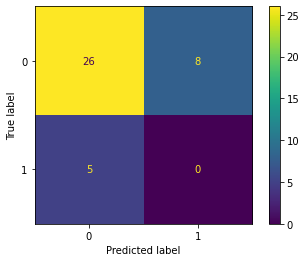

In [47]:
#plot_confusion_matrixのデフォルト設定でプロット
#confusion_matrix関数と渡す引数がちがうことに注意
plot_confusion_matrix(model_rf,test_x,test_y)

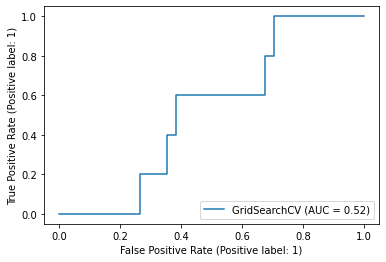

In [48]:
#plot_roc_curve関数によるROC曲線のプロット　引数は　モデル、test_x, test_y
from sklearn import metrics
rf_disp=metrics.plot_roc_curve(model_rf,test_x,test_y)  # treeのROC曲線
plt.show(rf_disp)  

OverSampling dataにたいしてロジステック回帰にてモデル作成

In [49]:
#ロジスティック回帰による分類
from sklearn.model_selection import cross_val_predict #交差検証
model_LR=LogisticRegression(solver='liblinear')#ハイパーパラメーターをかっこ内に記述
pred_y=cross_val_predict(model_LR,test_x,test_y,cv=5) #cross validation の分割数を指定
model_LR.fit(x_SMOTE,y_SMOTE)

acc=accuracy_score(test_y,pred_y)
recall=recall_score(test_y,pred_y)
precision=precision_score(test_y,pred_y)

print('Accuracy:',acc)
print('Recall:',recall)
print('Precision:',precision)
conf_matrix=confusion_matrix(test_y,pred_y)
tn_LR,fp_LR,fn_LR,tp_LR=conf_matrix.ravel()
print('tn_LR,fp_LR,fn_LR,tp_LR=',tn_LR,fp_LR,fn_LR,tp_LR)
f_measure=f1_score(test_y,pred_y)
print('F-measure:{}'.format(f_measure))
sensitivity=sensitivity1(test_y,pred_y)
print('Sensitivity:{}'.format(sensitivity))
specificity=specificity1(test_y,pred_y)
print('Specificity:{}'.format(specificity))

Accuracy: 0.8974358974358975
Recall: 0.2
Precision: 1.0
tn_LR,fp_LR,fn_LR,tp_LR= 34 0 4 1
F-measure:0.33333333333333337
Sensitivity:0.2
Specificity:1.0


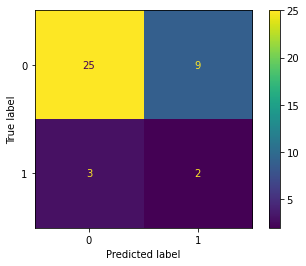

In [50]:
#plot_confusion_matrixのデフォルト設定でプロット
#confusion_matrix関数と渡す引数がちがうことに注意
plot_confusion_matrix(model_LR,test_x,test_y)

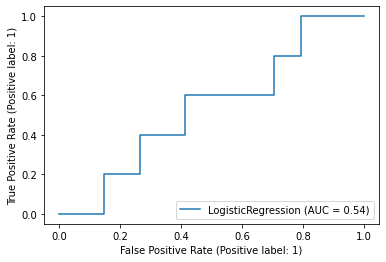

In [51]:
#plot_roc_curve関数によるROC曲線のプロット　引数は　モデル、test_x, test_y
LR_disp=metrics.plot_roc_curve(model_LR,test_x,test_y)  # treeのROC曲線
ax = plt.gca()
plt.show()  

LightGBM のscilit learn　APIによるモデル構築

In [52]:
#LightGBM scikit learn APIによる訓練 confusion matrix関数を使うにはsk-learn APIが必要

model_lgb = lgb.LGBMClassifier(objective='binary',
                        metric='auc',
                        n_estimators=1000,
                        early_stopping_rounds=100)
model_lgb.fit(x_SMOTE,y_SMOTE,#scilit learn APIではfitで訓練データを渡す original APIではtrain 
        eval_set=[(test_x, test_y)],
        verbose=50)

Training until validation scores don't improve for 100 rounds.
[50]	valid_0's auc: 0.405882
[100]	valid_0's auc: 0.394118
Early stopping, best iteration is:
[7]	valid_0's auc: 0.535294


LGBMClassifier(early_stopping_rounds=100, metric='auc', n_estimators=1000,
               objective='binary')

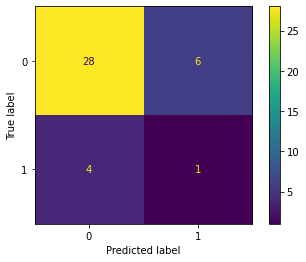

In [53]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(model_lgb,test_x,test_y)

In [54]:
pred_y=model_lgb.predict(test_x)
acc=accuracy_score(test_y,pred_y)
recall=recall_score(test_y,pred_y)
precision=precision_score(test_y,pred_y)
f_measure=f1_score(test_y,pred_y)
print('Accuracy:',acc)
print('Recall:',recall)
print('Precision:',precision)
print('F-measure:{}'.format(f_measure))
sensitivity=sensitivity1(test_y,pred_y)
print('Sensitivity:{}'.format(sensitivity))
specificity=specificity1(test_y,pred_y)
print('Specificity:{}'.format(specificity))
conf_matrix=confusion_matrix(test_y,pred_y)
tn,fp,fn,tp=conf_matrix.ravel()
print('tn,fp,fn,tp=',tn,fp,fn,tp)

Accuracy: 0.7435897435897436
Recall: 0.2
Precision: 0.14285714285714285
F-measure:0.16666666666666666
Sensitivity:0.2
Specificity:0.8235294117647058
tn,fp,fn,tp= 28 6 4 1


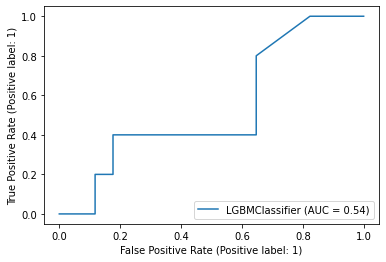

In [55]:
lgb_disp=metrics.plot_roc_curve(model_lgb,test_x,test_y)  # LGBMClassigier model2のROC曲線
plt.show()   

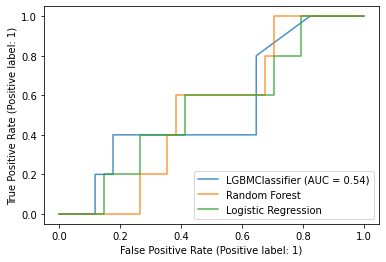

In [56]:
#いままでのROC曲線をまとめて表示
ax = plt.gca()
lgb_disp.plot(ax=ax, alpha=0.8)
rf_disp.plot(ax=ax,alpha=0.8,label='Random Forest')
LR_disp.plot(ax=ax,alpha=0.8,label='Logistic Regression')
plt.show()

LightGBMのscilitlearnAPIは微調整がしにくいので、精度を出すためにoriginal APIを使用する
https://qiita.com/hara_tatsu/items/5d1334a76b6645e3a1b4

In [57]:
import lightgbm as lgb
#originalAPIが認識する形に直す
# 訓練データ
lgb_train = lgb.Dataset(x_SMOTE,y_SMOTE)
# 評価データ
lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

In [58]:
# パラメータの設定
#※２値分類の場合 'objective': 'binary', 'metric': 'binary_error' #評価指標：正答率
parms = {
    'task': 'train', #トレーニング用
    'boosting': 'gbdt', #勾配ブースティング決定木
    'objective': 'binary', #目的：多値分類
    'metric': 'binary_error', #評価指標：正答率
    'num_iterations': 1000, #1000回学習
    'verbose': -1 #学習情報を非表示
}

# モデルの学習
lgb_model = lgb.train(parms,
                 #訓練データ
                 train_set=lgb_train,
                 # 評価データ
                 valid_sets=lgb_eval,
                 early_stopping_rounds=100)

[1]	valid_0's binary_error: 0.25641
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_error: 0.25641
[3]	valid_0's binary_error: 0.25641
[4]	valid_0's binary_error: 0.25641
[5]	valid_0's binary_error: 0.25641
[6]	valid_0's binary_error: 0.25641
[7]	valid_0's binary_error: 0.25641
[8]	valid_0's binary_error: 0.25641
[9]	valid_0's binary_error: 0.25641
[10]	valid_0's binary_error: 0.25641
[11]	valid_0's binary_error: 0.25641
[12]	valid_0's binary_error: 0.25641
[13]	valid_0's binary_error: 0.282051
[14]	valid_0's binary_error: 0.307692
[15]	valid_0's binary_error: 0.282051
[16]	valid_0's binary_error: 0.333333
[17]	valid_0's binary_error: 0.307692
[18]	valid_0's binary_error: 0.333333
[19]	valid_0's binary_error: 0.333333
[20]	valid_0's binary_error: 0.333333
[21]	valid_0's binary_error: 0.333333
[22]	valid_0's binary_error: 0.333333
[23]	valid_0's binary_error: 0.333333
[24]	valid_0's binary_error: 0.333333
[25]	valid_0's binary_error: 0.333333
[26]	val

Accuracy: 0.7435897435897436
Recall: 0.2
Precision: 0.14285714285714285
F-measure:0.16666666666666666
Sensitivity:0.2
Specificity:0.8235294117647058
tn,fp,fn,tp= 28 6 4 1


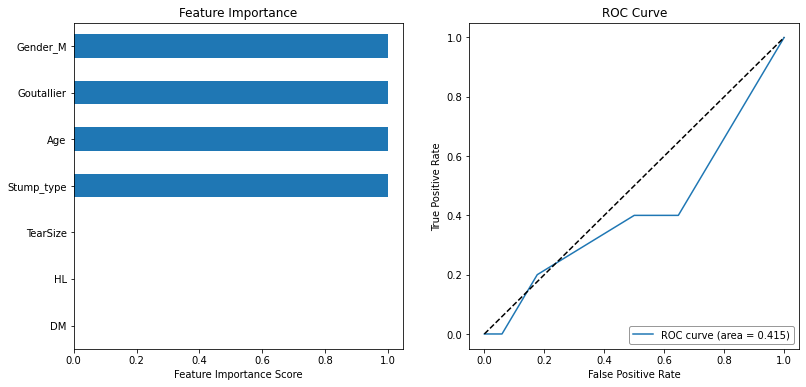

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
# テストデータによる推論
y_pred = lgb_model.predict(test_x, num_iteration=lgb_model.best_iteration)

# 評価指標の計算
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc = auc(fpr, tpr)

# 重要変数とROC-Curveの可視化
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
feat_imp = pd.Series(lgb_model.feature_importance(), index=test_x.columns).sort_values(ascending=False)
feat_imp = feat_imp.head(30)
feat_imp = feat_imp.sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Feature Importance', ax=axes[0], color=sns.color_palette()[0])
axes[0].set_xlabel('Feature Importance Score')
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
axes[1].plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
legend = axes[1].legend(frameon=True, loc='lower right', fontsize = 'medium') # 凡例
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('gray')
acc=accuracy_score(test_y,pred_y)
recall=recall_score(test_y,pred_y)
precision=precision_score(test_y,pred_y)
f_measure=f1_score(test_y,pred_y)
print('Accuracy:',acc)
print('Recall:',recall)
print('Precision:',precision)
print('F-measure:{}'.format(f_measure))
sensitivity=sensitivity1(test_y,pred_y)
print('Sensitivity:{}'.format(sensitivity))
specificity=specificity1(test_y,pred_y)
print('Specificity:{}'.format(specificity))
conf_matrix=confusion_matrix(test_y,pred_y)
tn,fp,fn,tp=conf_matrix.ravel()
print('tn,fp,fn,tp=',tn,fp,fn,tp)